# 相関係数の性質

In [12]:
from shiori.utils.viewer import set_plot_params, sns, plt
from shiori.utils.path import ProjectPath
from pathlib import Path
import matplotlib.animation as animation
import numpy as np
set_plot_params()
name = Path().cwd().name + "/correlation_coefficient"
proj = ProjectPath(save_dst=name)
save_dir = proj.save_dir
save_dir.mkdir(parents=True, exist_ok=True)
plt.rcParams.update({
    "text.usetex": True,               # LaTeXを使う
    "font.family": "Arial",            # セリフ体
    "font.serif": ["Computer Modern"], # LaTeX標準フォント
})


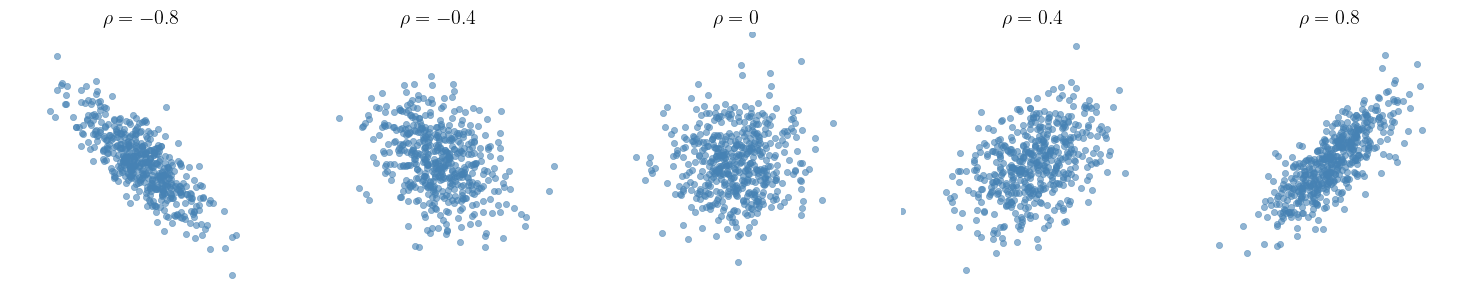

In [15]:
np.random.seed(42)  # 再現性のため

def generate_corr_data(rho, n=500):
    """相関係数 rho の2次元正規乱数を生成"""
    mean = [0, 0]
    cov = [[1, rho], [rho, 1]]  # 分散1、相関rhoの共分散行列
    return np.random.multivariate_normal(mean, cov, size=n)

# 相関係数のリスト
rhos = [-0.8, -0.4, 0, 0.4, 0.8]

fig, axes = plt.subplots(1, len(rhos), figsize=(15, 3))
for ax, rho in zip(axes, rhos):
    x, y = generate_corr_data(rho).T
    ax.scatter(x, y, alpha=0.6, s=20, color="steelblue")
    ax.set_title(rf"$\rho = {rho}$")
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.set_aspect("equal")
    ax.axis("off")

plt.tight_layout()
plt.savefig(save_dir / "correlation_scatter_plots.png", dpi=300, facecolor="white")
plt.show()

/tmp/ipykernel_1284260/773249758.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("viridis")


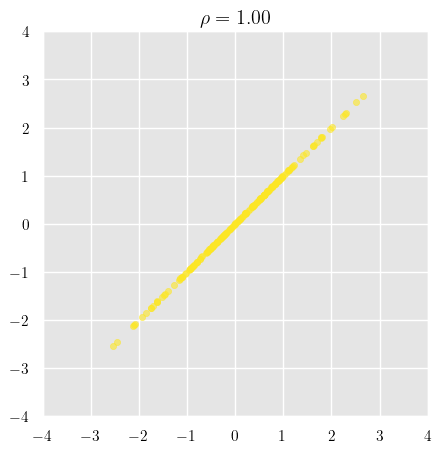

In [14]:
import matplotlib.cm as cm

np.random.seed(0)

def generate_corr_data(rho, n=200):
    mean = [0, 0]
    cov = [[1, rho], [rho, 1]]
    return np.random.multivariate_normal(mean, cov, size=n)

# rho を -1 から 1 まで 0.1 刻み
rhos = np.arange(-1.0, 1.01, 0.01)

# カラーマップを用意（赤→青）
cmap = cm.get_cmap("viridis")

fig, ax = plt.subplots(figsize=(5,5))
scat = ax.scatter([], [], s=20, alpha=0.6)
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_aspect("equal")
title = ax.set_title("")

def init():
    scat.set_offsets(np.empty((0, 2)))
    scat.set_facecolor("steelblue")
    title.set_text("")
    return scat, title

def update(frame):
    rho = rhos[frame]
    x, y = generate_corr_data(rho, n=200).T
    scat.set_offsets(np.c_[x, y])
    color = cmap((rho + 1) / 2)
    scat.set_facecolor(color)
    title.set_text(rf"$\rho = {rho:.2f}$")
    return scat, title

ani = animation.FuncAnimation(
    fig, update, frames=len(rhos), init_func=init,
    blit=True, interval=800, repeat=True
)

ani.save(save_dir.joinpath("correlation_color_animation.gif"), writer="pillow", fps=20)
plt.show()